In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
from pandas_profiling import ProfileReport
from csv import reader,DictReader

In [92]:
file='../data/survey_results_public_2019.csv'
dtype_dict={'CompTotal':'float64','ConvertedComp':'float64'}

In [93]:
df=pd.read_csv(file,\
               delimiter=',',\
               header=0,\
               encoding ='utf-8',\
               dtype=dtype_dict\
              )

In [94]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [95]:
df.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

In [96]:
df['CompTotal'].dtype

dtype('float64')

In [97]:
df[['CompTotal','CurrencySymbol','ConvertedComp','CompFreq']]

,CompTotal,CurrencySymbol,ConvertedComp,CompFreq
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,23000.0,THB,8820.0,Monthly
3,61000.0,USD,61000.0,Yearly
4,NaN,UAH,NaN,NaN
...,...,...,...,...
88878,NaN,NaN,NaN,NaN
88879,NaN,NaN,NaN,NaN
88880,NaN,NaN,NaN,NaN
88881,NaN,NaN,NaN,NaN


In [98]:
df[['DatabaseWorkedWith','DatabaseDesireNextYear']]

,DatabaseWorkedWith,DatabaseDesireNextYear
0,SQLite,MySQL
1,NaN,MySQL
2,PostgreSQL,PostgreSQL
3,MySQL;SQLite,MySQL;SQLite
4,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...
...,...,...
88878,Firebase;SQLite,Firebase;MySQL;SQLite
88879,NaN,NaN
88880,NaN,NaN
88881,NaN,NaN


In [99]:
#f_db_desired_list = lambda x: x['DatabaseDesireNextYear'].str.split(";")

df['SplitDatabaseDesireNextYear']=df['DatabaseDesireNextYear'].str.split(";")
s=df['SplitDatabaseDesireNextYear']

df2=s.apply(pd.Series).stack().reset_index(drop=True)


In [114]:
df22=df2.to_frame()
#df22.rename(columns={'0':'DesiredDBs'}, inplace=True)
df22.columns = ['DesiredDBs']
df22['cntr']=1
df22

,DesiredDBs,cntr
0,MySQL,1
1,MySQL,1
2,PostgreSQL,1
3,MySQL,1
4,SQLite,1
...,...,...
191616,SQLite,1
191617,MariaDB,1
191618,MySQL,1
191619,Oracle,1


<Figure size 432x288 with 0 Axes>

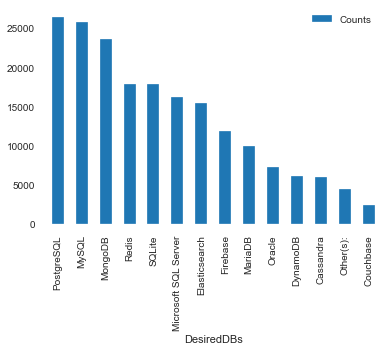

In [161]:
df222=df22.groupby('DesiredDBs').sum()['cntr'].to_frame()
df222.columns = ['Counts']
df222 = df222.sort_values('Counts',ascending=False)
plt.figure()
df222.plot(kind='bar')

In [10]:
df[['LanguageWorkedWith','LanguageDesireNextYear']]

,LanguageWorkedWith,LanguageDesireNextYear
0,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL
1,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL
2,HTML/CSS,Elixir;HTML/CSS
3,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL
4,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly
...,...,...
88878,HTML/CSS;JavaScript;Other(s):,C++;HTML/CSS;JavaScript;SQL;WebAssembly;Other(s):
88879,NaN,NaN
88880,NaN,NaN
88881,NaN,NaN


In [29]:
a1=['d','b','c']
a2=['a','b','c']
a1+a2

['d', 'b', 'c', 'a', 'b', 'c']

In [11]:
df[['PlatformWorkedWith','PlatformDesireNextYear']]

,PlatformWorkedWith,PlatformDesireNextYear
0,MacOS;Windows,Android;Arduino;Windows
1,Windows,Windows
2,NaN,NaN
3,Linux;Windows,Linux;Windows
4,Android;Linux;MacOS;Slack;Windows,Android;Docker;Kubernetes;Linux;Slack
...,...,...
88878,Linux,Google Cloud Platform;Linux
88879,NaN,NaN
88880,NaN,NaN
88881,NaN,NaN


In [12]:
df[['WebFrameWorkedWith','WebFrameDesireNextYear']]

,WebFrameWorkedWith,WebFrameDesireNextYear
0,Django;Flask,Flask;jQuery
1,Django,Django
2,NaN,Other(s):
3,NaN,NaN
4,Django;Express;Flask;jQuery;React.js;Spring,Flask;jQuery;React.js;Spring
...,...,...
88878,jQuery,jQuery;Vue.js
88879,NaN,NaN
88880,NaN,NaN
88881,NaN,NaN


In [13]:
df[['DevEnviron','OpSys','Containers','SocialMedia','Age','Gender']]

,DevEnviron,OpSys,Containers,SocialMedia,Age,Gender
0,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,Twitter,14.0,Man
1,Atom;PyCharm,Windows,I do not use containers,Instagram,19.0,Man
2,Vim;Visual Studio Code,Linux-based,I do not use containers,Reddit,28.0,Man
3,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Reddit,22.0,Man
4,IntelliJ;Notepad++;Vim,Linux-based,"Outside of work, for personal projects",Facebook,30.0,Man
...,...,...,...,...,...,...
88878,Atom;Visual Studio;Visual Studio Code,Windows,I do not use containers,YouTube,NaN,Man
88879,NaN,NaN,NaN,NaN,NaN,NaN
88880,NaN,NaN,NaN,NaN,NaN,NaN
88881,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.groupby('Age').count()['Respondent']

Age
1.0     18
2.0      8
3.0      3
4.0      1
5.0      3
        ..
95.0     2
97.0     1
98.0     3
98.9     1
99.0    21
Name: Respondent, Length: 126, dtype: int64